## Alternate Techniques for Finding the Period of a Variable Star ##

We used a phase diagram to meaure the period of $\delta$ Cephei.  The phase is given by:

$$ \phi = \frac{t - E}{P} - int\left(\frac{t - E}{P}\right) $$

where:

* t = date of observation
* E = date of first suspected maximum (don't really need to have this)
* P = estimate for period of variable star

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


### Example  ###

In [5]:
# assume we have observations of a star
# that were taken every night for 100 nights
t = np.arange(0,100,1) 
P = 5.3 # days
mag = np.sin(2*np.pi*t/P)
# let's add some noise to our measured mags
mag = mag + 0.2*np.random.uniform(-1,1,size=len(mag))


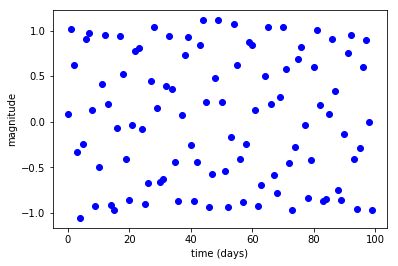

In [6]:
# let's plot this to visualize
plt.figure()
plt.plot(t,mag,'bo')
plt.xlabel('time (days)')
plt.ylabel('magnitude')


In [7]:
n = 7.3
q = n - int(n)
print(q)

0.3


Now let's fold the data according to our period

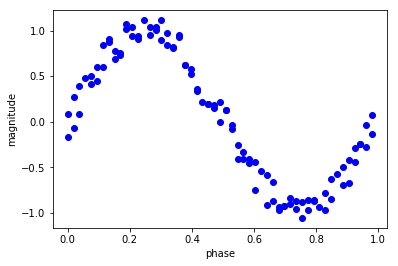

In [8]:
phi = (t/P) - np.array(t/P,'i')
plt.plot(phi,mag,'bo')
plt.xlabel('phase')
plt.ylabel('magnitude')


We can simplify our code by using the modulus

In [ ]:
7.2 % 4


In [ ]:

plt.figure()
plt.plot((t%P)/P,mag,'bo')
plt.xlabel('phase',fontsize=14)
plt.ylabel('magnitude',fontsize=14)


How else could we estimate the period???

The Fourier Transform provides another method of estimating the period.  

In astronomy, we often won't have observations at equally-spaced time intervals.  We there use a variant of the FFT called **Lomb-Scargle Periodogram** which is designed for unevenly spaced data.  Lucky for us, it's built into the astropy.stats module.

Here is how to use it:

In [9]:
from astropy.stats import LombScargle


In [10]:
freqx, powerx = LombScargle(t,mag).autopower()



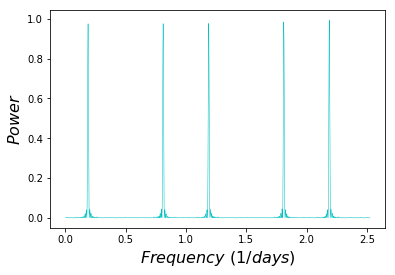

In [11]:
plt.figure()
plt.plot(freqx,(powerx),'c',label='ax',lw=.5) # apparently lw<1 plots faster
plt.xlabel('$Frequency \ (1/days)$',fontsize=16)
plt.ylabel('$Power$',fontsize=16)


(0, 10)

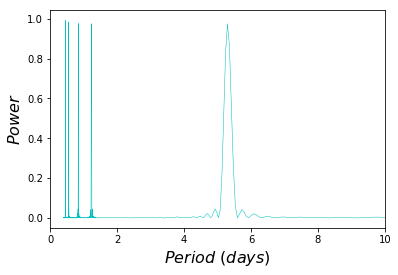

In [12]:
plt.figure()
plt.plot(1./freqx,(powerx),'c',label='ax',lw=.5) # apparently lw<1 plots faster
plt.xlabel('$Period \ (days)$',fontsize=16)
plt.ylabel('$Power$',fontsize=16)
plt.xlim(0,10)


You will notice there there is some noise at periods below our sampling period of 1 day.  We should ignore these.  The peak at 5.3 days is real.

### Exercise ###

* Create a fake data set that is a sum of three sinusoidal functions with three different periods and three different amplitudes. This is a situation you might observe if you were monitoring the radial velocity of a star that had three large planets orbiting it.  Use the following form for your sine functions.

$$ y_1 =A_1 sin\left ( \frac{2 \pi t}{P_1} \right )$$

* Add noise to both the t and y values.
* Compute the Lomb-Scargle Periodogram.
* Do you recover the periods that you input?